In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs) 

In [40]:
def average_flow_rate(v, t1,t2):
    return (v(t2) - v(t1)) / t2 - t1

def average_flow_rate_2(v,t1,t2):
    return (v(t2) - v(t1))/(t2 - t1)
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64


In [41]:
# Exercise 8.2: Write a Python function secant_line(f,x1,x2) that takes a function f(x) and two values,
# x1 and x2, and that returns a new function representing a secant line over time.
# For instance, if you ran line = secant_line (f,x1,x2), then line(3) would give you the y value of the secant line at x = 3.
def secant_line(f, x1, x2):
    return lambda x: f(x1) + (x - x1) * ((f(x2) - f(x1)) / (x2 - x1))

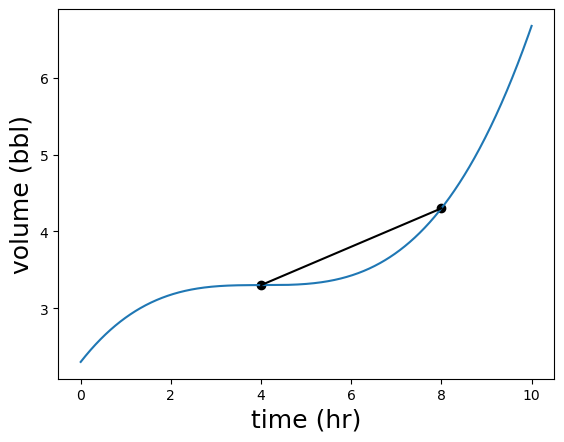

In [42]:
# Exercise 8.3: Write a function that uses the code from the previous exercise to plot a secant line of a function f between two given points.
def plot_secant(f, x1, x2, color='k'):
    line = secant_line(f, x1, x2)
    plot_function(line, x1,x2, c=color)
    plt.scatter([x1,x2], [f(x1), f(x2)], c=color)

plot_volume(volume, 0, 10)
plot_secant(volume, 4, 8)

In [43]:
def interval_flow_rates(v, t1, t2, dt):
    return list(map(lambda t: (t, average_flow_rate(v, t, t + dt)), np.arange(t1, t2, dt)))
interval_flow_rates(volume, 0,10,1)
# plt.scatter(np.arange(0,10,1), interval_flow_rates(volume,0,10,1))

[(0, 0.578125),
 (1, -0.8515625),
 (2, -1.9635416666666667),
 (3, -2.99609375),
 (4, -3.996875),
 (5, -4.981770833333333),
 (6, -5.957589285714286),
 (7, -6.927734375),
 (8, -7.894097222222222),
 (9, -8.8578125)]

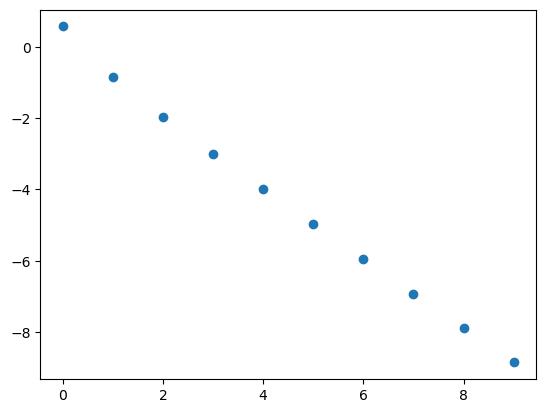

In [44]:
def plot_interval_flow_rates(volume,t1,t2,dt):
   series = interval_flow_rates(volume,t1,t2,dt)
   times = list(map(lambda s: s[0], series))
   rates = list(map(lambda s: s[1], series))
   plt.scatter(times,rates)

plot_interval_flow_rates(volume,0,10,1)